# Decision Trees and Random Forests in Python


In this Lecture we will be going over Decision Trees and Random Forests. In order for you to understand this lecture completely there is some required reading. First read the following [lecture notes](slides/Intro to Tree Methods.pdf)

After reading the lecture notes you should have a basic understanding of how decision trees and random forests work. Lets see how we can implement them in Python!

## Why Random forests ?

Please first read and apply the following example in able to understand why random forests is a better as classifier than classical decession tree classifier 
* [random forests classifier](Decision-Trees-and-Random-Forests/Decision Trees and Random Forests.ipynb)



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('example data/kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

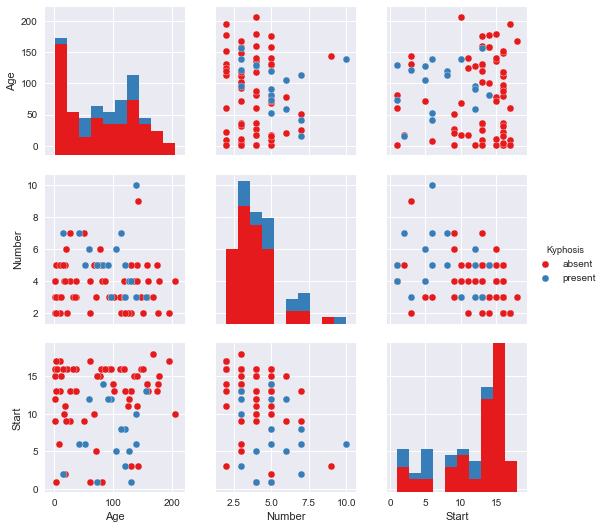

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.82      0.95      0.88        19
    present       0.67      0.33      0.44         6

avg / total       0.78      0.80      0.77        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[18  1]
 [ 4  2]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [16]:
rfc_pred = rfc.predict(X_test)

In [17]:
print(confusion_matrix(y_test,rfc_pred))

[[19  0]
 [ 5  1]]


In [18]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



# Great Job!